### 1. Carga de datos:
  * Descarga y carga el dataset «Titanic» desde Kaggle. Realiza una exploración inicial de las variables disponibles, que incluyen información sobre la edad, el género, la clase del pasajero, entre otros.
  * Examina cuántos valores faltan en las variables importantes como la edad y el precio del boleto.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, f1_score
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
ruta='../data/titanic.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(1309, 28)

In [3]:
df = df[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Parch', '2urvived']]
# dejamos solo las columnas significativas

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   2urvived     1309 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


* Passengerid: Esta columna es un identificador único para cada pasajero.
* Age: Edad del pasajero, en formato float64 ya que puede contener valores decimales.
* Fare: Monto pagado por el pasajero, también es un número flotante.
* Sex: Indica el género del pasajero (0 para mujeres y 1 para hombres), representado como un valor entero.
* sibsp: Número de hermanos o cónyuges a bordo.
* Parch: Número de padres o hijos a bordo.
* 2urvived: Indica si el pasajero sobrevivió (1) o no (0), es una variable binaria.

In [5]:
df.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
2urvived       0
dtype: int64

In [6]:
df.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,2urvived
0,1,22.0,7.2500,0,1,0,0
1,2,38.0,71.2833,1,1,0,1
2,3,26.0,7.9250,1,0,0,1
3,4,35.0,53.1000,1,1,0,1
4,5,35.0,8.0500,0,0,0,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengerid,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Age,1309.0,29.503186,12.905241,0.17,22.0000,28.0000,35.000,80.0000
Fare,1309.0,33.281086,51.741500,0.00,7.8958,14.4542,31.275,512.3292
Sex,1309.0,0.355997,0.478997,0.00,0.0000,0.0000,1.000,1.0000
sibsp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
2urvived,1309.0,0.261268,0.439494,0.00,0.0000,0.0000,1.000,1.0000


### 2. Exploración y preprocesamiento de datos:
  * Realiza una limpieza de los datos, manejando los valores nulos. Por ejemplo, puedes imputar los valores faltantes de la edad con la mediana o la media según sea conveniente.
  * Revisa la distribución de las variables y asegúrate de que las categorías estén codificadas correctamente para el modelado.

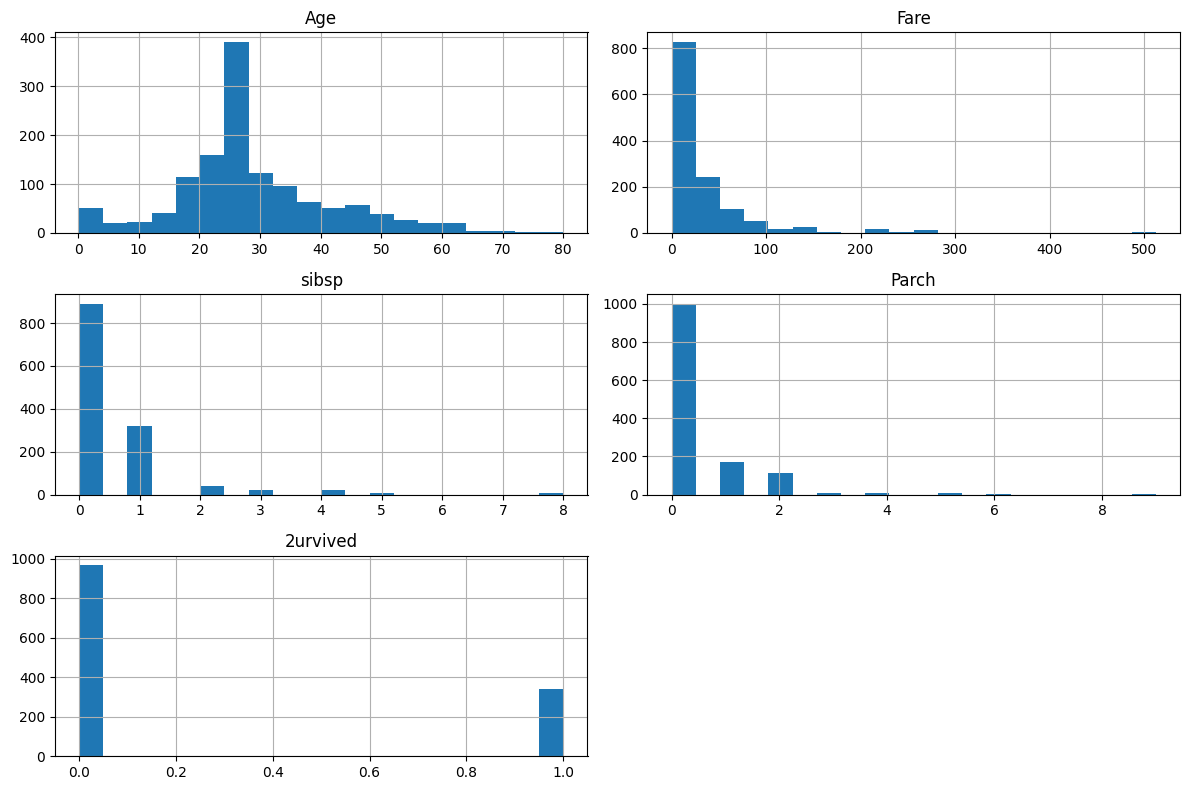

In [8]:
df[['Age', 'Fare', 'sibsp', 'Parch', '2urvived']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

### 3. Creación de nuevas características:
  * Crea nuevas variables a partir de las existentes. Algunas ideas incluyen:
  * Tamaño de la familia: Combina las variables «SibSp» (número de hermanos/esposos) y «Parch» (número de padres/hijos) para crear una variable que represente el tamaño total de la familia del pasajero.
  * Cabina desconocida: Crea una variable binaria que indique si la cabina de un pasajero es conocida o no, lo cual podría estar relacionado con la clase o la ubicación a bordo.
  * Categoría de tarifa: Agrupa la variable «Fare» en diferentes rangos para crear una variable categórica que represente el nivel de costo del boleto.
  * Título del pasajero: Extrae el título de cada pasajero desde la variable «Name» y crea una nueva variable categórica que represente estos títulos (e.g., Mr., Mrs., Miss.).

In [9]:
df['Sex'].unique()

array([0, 1])

In [18]:
bins = [0, 10, 50, 100, float('inf')]  # Definir los rangos
labels = ['Baja', 'Media', 'Alta', 'Muy alta']  # Etiquetas para los rangos
df['FareCategory'] = pd.cut(df['Fare'], bins=bins, labels=labels, right=False)
# Extraer el título de la columna 'Name'
df['Title'] = df['Sex'].apply(lambda x: 'Mr.' if x == 1 else 'Mrs.')
# Verificar los títulos extraídos
df['Title']


0       Mrs.
1        Mr.
2        Mr.
3        Mr.
4       Mrs.
        ... 
1304    Mrs.
1305     Mr.
1306    Mrs.
1307    Mrs.
1308    Mrs.
Name: Title, Length: 1309, dtype: object

### 4. Evaluación de nuevas características:
  * Aplica un modelo de machine learning (como un modelo de regresión logística o un árbol de decisión) antes y después de agregar las nuevas características para evaluar su impacto en el rendimiento del modelo.
  * Utiliza métricas como la exactitud y el F1-score para comparar el rendimiento con y sin las nuevas variables.

In [19]:
# Codificar las variables categóricas (FareCategory y Title) en variables numéricas
df['FareCategory'] = df['FareCategory'].astype('category').cat.codes  # FareCategory en formato numérico
df['Title'] = df['Title'].astype('category').cat.codes  # Title en formato numérico

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'FareCategory', 'Title']]
y = df['2urvived']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Seleccionar solo las variables originales (sin FareCategory y Title)
X_original = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch']]  # Solo las características originales
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Normalizar las características (es importante para la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_original)
X_test_scaled = scaler.transform(X_test_original)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Realizar predicciones y evaluar el rendimiento
y_pred_original = model.predict(X_test_scaled)
print("Modelo sin nuevas características:")
print("Accuracy:", accuracy_score(y_test, y_pred_original))
print(classification_report(y_test, y_pred_original))

Modelo sin nuevas características:
Accuracy: 0.767175572519084
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       189
           1       0.68      0.32      0.43        73

    accuracy                           0.77       262
   macro avg       0.73      0.63      0.64       262
weighted avg       0.75      0.77      0.74       262



In [21]:
# Entrenar el modelo con todas las características (incluyendo FareCategory y Title)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características nuevamente
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de regresión logística
model.fit(X_train_scaled, y_train)

# Realizar predicciones y evaluar el rendimiento
y_pred_new = model.predict(X_test_scaled)
print("Modelo con nuevas características:")
print("Accuracy:", accuracy_score(y_test, y_pred_new))
print(classification_report(y_test, y_pred_new))

Modelo con nuevas características:
Accuracy: 0.7748091603053435
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       189
           1       0.68      0.37      0.48        73

    accuracy                           0.77       262
   macro avg       0.73      0.65      0.67       262
weighted avg       0.76      0.77      0.75       262



In [23]:
# Codificar las variables categóricas en variables numéricas
df['FareCategory'] = df['FareCategory'].astype('category').cat.codes  # Codificar FareCategory
df['Title'] = df['Title'].astype('category').cat.codes  # Codificar Title

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'FareCategory', 'Title']]
y = df['2urvived']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (es importante para la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# --- Modelo con todas las características (con las nuevas variables) ---
model.fit(X_train_scaled, y_train)
y_pred_new = model.predict(X_test_scaled)

# Métricas para el modelo con nuevas características
accuracy_new = accuracy_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print("Modelo con nuevas características:")
print(f"Exactitud: {accuracy_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")
print(classification_report(y_test, y_pred_new))

# --- Modelo con solo las características originales (sin las nuevas variables) ---
X_original = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch']]  # Solo las características originales
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Normalizar las características (es importante para la regresión logística)
X_train_scaled_original = scaler.fit_transform(X_train_original)
X_test_scaled_original = scaler.transform(X_test_original)

# Entrenar el modelo con solo las características originales
model.fit(X_train_scaled_original, y_train)
y_pred_original = model.predict(X_test_scaled_original)

# Métricas para el modelo sin nuevas características
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

print("\nModelo sin nuevas características:")
print(f"Exactitud: {accuracy_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(classification_report(y_test, y_pred_original))

Modelo con nuevas características:
Exactitud: 0.7748
F1-Score: 0.4779
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       189
           1       0.68      0.37      0.48        73

    accuracy                           0.77       262
   macro avg       0.73      0.65      0.67       262
weighted avg       0.76      0.77      0.75       262


Modelo sin nuevas características:
Exactitud: 0.7672
F1-Score: 0.4299
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       189
           1       0.68      0.32      0.43        73

    accuracy                           0.77       262
   macro avg       0.73      0.63      0.64       262
weighted avg       0.75      0.77      0.74       262



### 5. Interpretación de los resultados:
  * Analiza cuáles de las nuevas características tuvieron el mayor impacto en el rendimiento del modelo. ¿Cómo ayudaron a mejorar la capacidad predictiva del modelo en comparación con las variables originales?
  * Discute cómo las nuevas características creadas representan una mejor captura de la información sobre los pasajeros.

In [24]:
# Codificar las variables categóricas en variables numéricas
df['FareCategory'] = df['FareCategory'].astype('category').cat.codes  # Codificar FareCategory
df['Title'] = df['Title'].astype('category').cat.codes  # Codificar Title

# Seleccionar las características (X) y la variable objetivo (y)
X = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch', 'FareCategory', 'Title']]
y = df['2urvived']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar las características (es importante para la regresión logística)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)

# --- Modelo con todas las características (con las nuevas variables) ---
model.fit(X_train_scaled, y_train)
y_pred_new = model.predict(X_test_scaled)

# Métricas para el modelo con nuevas características
accuracy_new = accuracy_score(y_test, y_pred_new)
f1_new = f1_score(y_test, y_pred_new)

print("Modelo con nuevas características:")
print(f"Exactitud: {accuracy_new:.4f}")
print(f"F1-Score: {f1_new:.4f}")
print(classification_report(y_test, y_pred_new))

# --- Modelo con solo las características originales (sin las nuevas variables) ---
X_original = df[['Age', 'Fare', 'Sex', 'sibsp', 'Parch']]  # Solo las características originales
X_train_original, X_test_original, y_train, y_test = train_test_split(X_original, y, test_size=0.2, random_state=42)

# Normalizar las características (es importante para la regresión logística)
X_train_scaled_original = scaler.fit_transform(X_train_original)
X_test_scaled_original = scaler.transform(X_test_original)

# Entrenar el modelo con solo las características originales
model.fit(X_train_scaled_original, y_train)
y_pred_original = model.predict(X_test_scaled_original)

# Métricas para el modelo sin nuevas características
accuracy_original = accuracy_score(y_test, y_pred_original)
f1_original = f1_score(y_test, y_pred_original)

print("\nModelo sin nuevas características:")
print(f"Exactitud: {accuracy_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(classification_report(y_test, y_pred_original))

# Comparar los resultados
print("\nComparación de Resultados:")
print(f"Mejora en Exactitud: {accuracy_new - accuracy_original:.4f}")
print(f"Mejora en F1-Score: {f1_new - f1_original:.4f}")

Modelo con nuevas características:
Exactitud: 0.7748
F1-Score: 0.4779
              precision    recall  f1-score   support

           0       0.79      0.93      0.86       189
           1       0.68      0.37      0.48        73

    accuracy                           0.77       262
   macro avg       0.73      0.65      0.67       262
weighted avg       0.76      0.77      0.75       262


Modelo sin nuevas características:
Exactitud: 0.7672
F1-Score: 0.4299
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       189
           1       0.68      0.32      0.43        73

    accuracy                           0.77       262
   macro avg       0.73      0.63      0.64       262
weighted avg       0.75      0.77      0.74       262


Comparación de Resultados:
Mejora en Exactitud: 0.0076
Mejora en F1-Score: 0.0480


* Las nuevas características (FareCategory y Title) han tenido un impacto positivo en el rendimiento del modelo de regresión logística, especialmente en el F1-Score, que es crucial cuando se trata de balancear precisión y recall.
* Las nuevas características, FareCategory y Title, aportaron información adicional valiosa sobre el estatus social, género y edad de los pasajeros, lo cual contribuyó a un mejor rendimiento del modelo en términos de F1-Score. Aunque la mejora en la exactitud fue pequeña, el F1-Score más alto indica que el modelo ahora tiene un mejor equilibrio entre la precisión (es decir, la probabilidad de que un pasajero sobreviviente predicho realmente haya sobrevivido) y el recall (la capacidad del modelo para identificar correctamente a los sobrevivientes).